# Microsoft's New Movie Maker

In [1]:
from IPython.display import Image
Image("/Users/matthewnykaza/Documents/Flatiron/Phase-1-Project/dsc-phase-1-project-online/2ac566bdad689373d124ed45b5b70209.png")



# Overview
In order to have a viable business that can last well into the future, it is imperative to diversify. For the past 4 decades Microsoft has been a major playing in the computer marketplace, later getting into a bevy of different adjacent markets. In order to remain competitive with companies like Apple, Amazon and Google (to name a few), Microsoft must become a player in the original content game. I believe that with the following recommendations that I can assist Microsoft in achieving that goal. 

# Business Problem
Microsoft has never had a major original programming, and the decision as to the way to get in is to begin a major motion picture studio. The issue is that Microsoft is not sure about any of the major details of creating movies. I have taken some datasets and feel that through my thorough review of genres, release dates, and monetary success I can help Microsoft become a successful movie maker. 

# The Data
In this analysis I recieved data from IMDB and The Numbers (provided to me by The Flatiron School. This data included movie basics, budgets and ratings for a wide variety of films. 

In [2]:
#Import needed libraries to help with data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline

In [3]:
#Creating the dataframe from the raw data
budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
ratings_df = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
basics_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")


# Budgets Data
This dataset includes the movie's title, release date, production budget, domestic and worldwide gross. 

In [4]:
#Review dataframes
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
#Check datatypes 
budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

# The Ratings Data
The ratings dataset includes tconst (a unique movie identifier), average ratings, and number of ratings.

In [6]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
ratings_df.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

# The Basics Data
The basics dataset includes tconst (that same identifier), the primary and original title, start year, runtime (in minutes) and genres.

In [8]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
basics_df.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

## Begin work on budget_df

In order to properly review these datasets I need to make appropriate edit and cleanings to make this data usable for analysis. 

In [10]:
#Check for NaN data
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [11]:
#Change date to datetime feature
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'])

In [12]:
#Preparing for a later merge, lets make a new column with just year
budgets_df['release_year'] = pd.DatetimeIndex(budgets_df['release_date']).year


In [13]:
#Sanity Check
#looks good!
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [14]:
#Check for any created NaNs
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
dtype: int64

In [15]:
#Removing $ from the beginning of the data and previewing. 
#Make sure to only run once!!!
budgets_df['production_budget'] = [x[1:] for x in budgets_df['production_budget']]
budgets_df['domestic_gross'] = [x[1:] for x in budgets_df['domestic_gross']]
budgets_df['worldwide_gross'] = [x[1:] for x in budgets_df['worldwide_gross']]

In [16]:
#Removing commas from dataframe objects that need to later be changed to integers
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].replace(',', '', regex=True)
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].replace(',', '', regex=True)
budgets_df['production_budget'] = budgets_df['production_budget'].replace(',', '', regex=True)

In [17]:
#Sanity Check
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [18]:
#Sanity check
budgets_df.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
release_year                  int64
dtype: object

In [19]:
#Setting type as integer for monetary columns
budgets_df['production_budget'] = budgets_df['production_budget'].astype('int64')
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].astype('int64')
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].astype('int64')
budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [20]:
#Creating a new column showing total gross minus the production budget
budgets_df['gross_less_budget'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']


In [21]:
#Check for NaN data
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
gross_less_budget    0
dtype: int64

## Cleaning the Ratings and Basics Dataframes


In [22]:
#Get a quick overview of dataframe
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [23]:
#Check NaNs 
ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [24]:
basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [25]:
#Basics looks to have some issues with NaN values, we will worry about that
#in a little bit after we complete a merge
basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [26]:
#Merge ratings and basics
basic_ratings_df = pd.merge(basics_df, ratings_df, on='tconst')
basic_ratings_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [27]:
#Verify merge accuracy 
basics_df.loc[basics_df['tconst'] == "tt0100275"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [28]:
ratings_df.loc[ratings_df['tconst'] == "tt0100275"]

,tconst,averagerating,numvotes
1143,tt0100275,6.5,119


In [29]:
#All looks to be in working order
basic_ratings_df.loc[basic_ratings_df['tconst'] == "tt0100275"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [30]:
#Check .describe() of basic_ratings_df
#.apply(lambda s: s.apply('{0:.5f}'.format)) will remove scientific notation 
#for easier readability
basic_ratings_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,start_year,runtime_minutes,averagerating,numvotes
count,73856.00000,66236.00000,73856.00000,73856.00000
mean,2014.27613,94.65404,6.33273,3523.66217
std,2.61481,208.57411,1.47498,30294.02297
min,2010.00000,3.00000,1.00000,5.00000
25%,2012.00000,81.00000,5.50000,14.00000
50%,2014.00000,91.00000,6.50000,49.00000
75%,2016.00000,104.00000,7.40000,282.00000
max,2019.00000,51420.00000,10.00000,1841066.00000


# Some Takeaways:
- Years all between 2010 and 2019
    - Should be okay as more recent data should be more relevant for our analysis
- We have some crazy variance in runtime minutes
    - The standard deviation is almost exactly twice the 75 percentile of data
- Ratings seems okay on the surface
- Number of votes has a high variance
    - Clearly some major outliers on the upper end of the spectrum

In [31]:
#Check some more basics
basic_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    66236 non-null float64
genres             73052 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [32]:
#Look into any duplicates
#check any title duplicates, look into this
duplicates = basic_ratings_df[basic_ratings_df['primary_title'].duplicated(keep=False)]
print(len(duplicates))

6607


In [33]:
duplicates.sort_values(by='primary_title').head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
25949,tt2518788,1,1,2013,112.0,"Documentary,History,Sport",8.0,3452
12250,tt1859618,1,1,2019,100.0,Drama,9.2,13
52873,tt5282238,10,10,2015,90.0,Thriller,4.7,7
13822,tt1941430,10,10,2011,NaN,Action,3.4,9
12486,tt1869226,100% Love,100% Love,2011,141.0,"Comedy,Drama,Romance",7.0,2331
26727,tt2579680,100% Love,100% Love,2012,166.0,"Comedy,Drama,Romance",6.0,296
61951,tt6474850,11,11,2017,NaN,"Action,Thriller",6.4,8
33149,tt3187586,11,11,2014,87.0,"Crime,Drama,Thriller",6.2,5
14576,tt1979163,180,180,2011,107.0,"Comedy,Drama",7.4,42
12111,tt1855110,180,180,2011,121.0,"Drama,Romance",6.0,688


In [34]:
duplicates.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,6607.000000,6043.000000,6607.000000,6607.000000
mean,2014.269865,95.168128,6.180748,4891.036779
std,2.619411,22.207297,1.375043,29937.010262
min,2010.000000,3.000000,1.200000,5.000000
25%,2012.000000,84.000000,5.300000,19.000000
50%,2014.000000,92.000000,6.300000,84.000000
75%,2016.000000,105.000000,7.100000,558.000000
max,2019.000000,495.000000,10.000000,621193.000000


- Looks like we have a great number of duplicate titles
    - A quick look indicates that almost all of these are different movies
        - Looking at tconst, start_year, runtime_minutes, genre
        - Meaning that they likely are different movies that just happen to have the same title
    - This will make some later merging a little bit more difficult, and we will lose some data
    - However they only seem to represent 9% of the data
        - Given that we will keep many of these based off of their start_year we are in line to lose far less data

In [35]:
#Check NaNs again, looks like we have a few to mull over
basic_ratings_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [36]:
#Start with updating genres NaN values
#Overall pretty easy, simply fill them in as a new genre "Unknown"
basic_ratings_df['genres'] = basic_ratings_df['genres'].fillna('Unknown')
basic_ratings_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
averagerating         0
numvotes              0
dtype: int64

In [37]:
#Move on to exploring the runtime issues
#looking into movies with NAN runtime
is_nan = basic_ratings_df.isnull()
rows_nan = is_nan.any(axis=1)
row_nan = basic_ratings_df[rows_nan]
row_nan.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
17,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",6.7,236
21,tt0263814,On kadin,On kadin,2019,NaN,Drama,7.1,100
26,tt0285423,Abolição,Abolição,2019,NaN,Documentary,7.4,35


In [38]:
row_nan.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,7620.000000,0.0,7620.000000,7620.000000
mean,2014.479921,NaN,6.426640,43.027822
std,2.728949,NaN,1.608632,97.689502
min,2010.000000,NaN,1.000000,5.000000
25%,2012.000000,NaN,5.400000,8.000000
50%,2015.000000,NaN,6.600000,15.000000
75%,2017.000000,NaN,7.600000,36.000000
max,2019.000000,NaN,10.000000,2782.000000


# Some Takeaways:
- 7620 movies, roughly 10% of the total data
    - Do not want to simply get rid of them
- Mostly inline with the averageratings of the data
- Still a solid variance on numvotes, but not nearly as much as our raw data
    - Likely due to the fact that these are more foreign or lesser known films
- Need to find a way to keep the data, without skewing the rest of the runtime_minutes data too far

In [39]:
#Check on mean and median of runtime_minutes
runtime_med = basic_ratings_df['runtime_minutes'].median()
runtime_mean = basic_ratings_df['runtime_minutes'].mean()

print(f'This is the mean {runtime_mean} and median {runtime_med} for the runtime_minutes data')

This is the mean 94.6540400990398 and median 91.0 for the runtime_minutes data


I believe that using the median is the best approach
- Either way they are so close that it shouldn't skew that data much either way

In [40]:
#Fill in NaN data
basic_ratings_df['runtime_minutes'] = basic_ratings_df['runtime_minutes'].fillna(91)
basic_ratings_df.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [41]:
#Check to see how much data was skewed
basic_ratings_df['runtime_minutes'].describe()

count    73856.000000
mean        94.277039
std        197.524557
min          3.000000
25%         83.000000
50%         91.000000
75%        101.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

Data looks mostly unaffected from a mean and median (50%) outlook

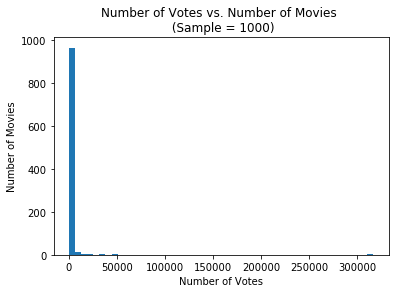

In [42]:
#Create quick histogram to view numvotes 
x = basic_ratings_df['numvotes'].sample(n=1000)
y = len(x)
plt.hist(x,bins=50)
plt.title('Number of Votes vs. Number of Movies \n (Sample = 1000)')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies')
plt.show()    

- As we can see on that basic histogram, almost all of the data is stacked in the front of the data, major outliers on the upper end
    - This is further proven with the std of 30294.02297 for this data

# Genres in basic_ratings_df
- Much of the data has more than one genre listed
- 924 different genres, personally I can not think of more than 10 off the top of my head
- Need to seperate this out to get a better analysis

In [43]:
basic_ratings_df['genres'].nunique()

924

In [44]:
#Ok, now let separate out the genres so that we can do more analysis into which are popular genres and how they perform in the boxoffice
genres_col = basic_ratings_df['genres'].str.split(',')
genres_col

0          [Action, Crime, Drama]
1              [Biography, Drama]
2                         [Drama]
3                 [Comedy, Drama]
4        [Comedy, Drama, Fantasy]
                   ...           
73851               [Documentary]
73852             [Drama, Family]
73853               [Documentary]
73854                   [Unknown]
73855               [Documentary]
Name: genres, Length: 73856, dtype: object

In [45]:
#Getting a list of all possible genres
genres_list = []
for row in genres_col:
    for item in row:
        genres_list.append(item)
genres_list = sorted(list(set(genres_list)))

In [46]:
print(genres_list)
print(len(genres_list))

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'Unknown', 'War', 'Western']
27


Went from 924 different genres, to a more accurate 27 individual genres

In [47]:
#Creating a dataframe of genres
genres_df = pd.DataFrame(genres_col)

In [48]:
genres_df.head()

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama]"
4,"[Comedy, Drama, Fantasy]"


In [49]:
#Creating new columns for each genre that start out at 0
for col in genres_list:
    genres_df[col] = 0

In [50]:
genres_df.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Create a loop that adds ta value where an individual genre is present in the genres column
for row in genres_df.index:
    for genre in genres_list:
        if genre in genres_df['genres'][row]:
            genres_df[genre][row] = 1

/Users/matthewnykaza/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [52]:
genres_df.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,"[Action, Crime, Drama]",1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Merge the genres into the working dataframe
basic_ratings_df = pd.concat([basic_ratings_df, genres_df[genres_list]], axis=1)


In [54]:
#Check for accuracy
basic_ratings_df.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#Check for NaNs
basic_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 35 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    73856 non-null float64
genres             73856 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
Action             73856 non-null int64
Adult              73856 non-null int64
Adventure          73856 non-null int64
Animation          73856 non-null int64
Biography          73856 non-null int64
Comedy             73856 non-null int64
Crime              73856 non-null int64
Documentary        73856 non-null int64
Drama              73856 non-null int64
Family             73856 non-null int64
Fantasy            73856 non-null int64
Game-Show          73856 non-null int64
History            73856 non-null int64
Horror             73856 non-null int64
Mus

In [56]:
basic_ratings_df.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
Action             0
Adult              0
Adventure          0
Animation          0
Biography          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Game-Show          0
History            0
Horror             0
Music              0
Musical            0
Mystery            0
News               0
Reality-TV         0
Romance            0
Sci-Fi             0
Short              0
Sport              0
Thriller           0
Unknown            0
War                0
Western            0
dtype: int64

In [57]:
#which genres are most popular
genre_sum_dict = {}
for genre in genres_list:
    genre_sum_dict[genre] = basic_ratings_df[genre].sum()

In [58]:
genre_sum_dict

{'Action': 6988,
 'Adult': 3,
 'Adventure': 3817,
 'Animation': 1743,
 'Biography': 3809,
 'Comedy': 17290,
 'Crime': 4611,
 'Documentary': 17753,
 'Drama': 30788,
 'Family': 3412,
 'Fantasy': 2126,
 'Game-Show': 2,
 'History': 2825,
 'Horror': 7674,
 'Music': 1968,
 'Musical': 721,
 'Mystery': 3039,
 'News': 579,
 'Reality-TV': 17,
 'Romance': 6589,
 'Sci-Fi': 2206,
 'Short': 1,
 'Sport': 1179,
 'Thriller': 8217,
 'Unknown': 804,
 'War': 853,
 'Western': 280}

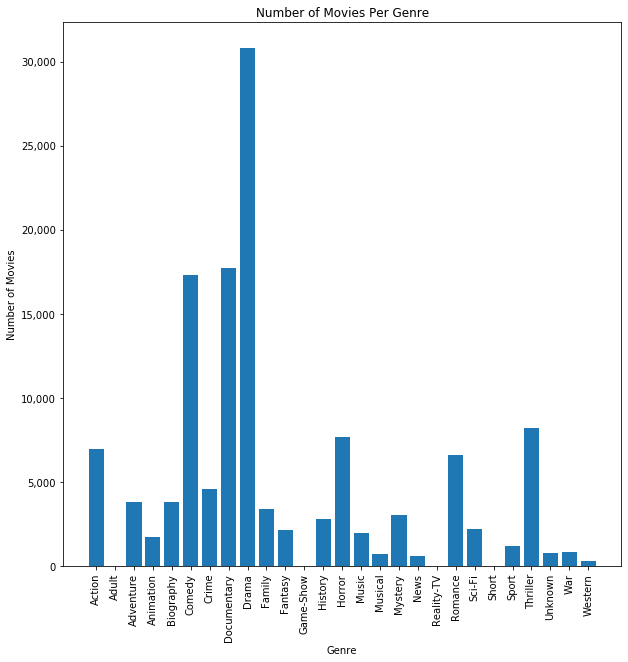

In [59]:
plt.figure(figsize = (10, 10))
plt.bar(genre_sum_dict.keys(), genre_sum_dict.values())

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=90)

plt.title('Number of Movies Per Genre')
plt.ylabel("Number of Movies")
plt.xlabel("Genre")

plt.savefig("", dpi=150)
plt.show()

# Merge all the data!

In [60]:
#We know that basic_ratings_df only has movies 2010-2019
budgets_df['release_year'].unique()

array([2009, 2011, 2019, 2015, 2017, 2018, 2007, 2012, 2013, 2010, 2016,
       2014, 2006, 2008, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2020,
       2002, 1998, 2000, 1991, 1994, 1996, 1993, 1992, 1988, 1990, 1989,
       1978, 1981, 1984, 1982, 1985, 1980, 1963, 1987, 1986, 1983, 1979,
       1977, 1970, 1969, 1976, 1965, 1962, 1964, 1959, 1966, 1974, 1956,
       1975, 1973, 1960, 1967, 1968, 1971, 1951, 1972, 1961, 1946, 1944,
       1953, 1954, 1957, 1952, 1930, 1939, 1925, 1950, 1948, 1958, 1943,
       1940, 1945, 1947, 1938, 1927, 1949, 1955, 1936, 1937, 1941, 1942,
       1933, 1935, 1931, 1916, 1929, 1934, 1915, 1920])

In [61]:
#remove all movies before 2010 so it best matches with other dataset
budgets_df = budgets_df[~(budgets_df['release_date'] <= '2009-12-31')]
budgets_df['release_year'].unique()

array([2011, 2019, 2015, 2017, 2018, 2012, 2013, 2010, 2016, 2014, 2020])

In [62]:
#Going to merge on title_year (to be created), need to check on any movies
#that already have this as their title and remove it, before adding it back
budgets_df[budgets_df['movie'].str.contains("\(")].head(10)



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget
2785,86,2014-10-17,Birdman or (The Unexpected Virtue of Ignorance),18000000,42340598,103215094,2014,85215094
4461,62,2016-12-31,Airlift (2016),4400000,0,9969237,2016,5569237
5010,11,2013-02-08,ABCD (Any Body Can Dance),1900000,222098,10137234,2013,8237234


In [63]:
for row in budgets_df.index:
    if "(" in budgets_df['movie'][row]:
        split = budgets_df['movie'][row].split(" (")
        if "201" in split[1]: # this will get rid of things labeled re-release or re-issue, which is fine
            budgets_df['movie'][row] = split[0]

In [64]:
#now lets add a column that is movie(year) to help with merging
budgets_df['title_year'] = budgets_df['movie'] + ' (' + budgets_df['release_year'].astype(str) + ')' 
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget,title_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,Pirates of the Caribbean: On Stranger Tides (2...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,Dark Phoenix (2019)
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,Avengers: Age of Ultron (2015)
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,Star Wars Ep. VIII: The Last Jedi (2017)
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,Star Wars Ep. VII: The Force Awakens (2015)


In [65]:
#Now check on basic_ratings
basic_ratings_df[basic_ratings_df['primary_title'].str.contains("\(")].head(10)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
204,tt0756727,Who Is Harry Nilsson (And Why Is Everybody Tal...,Who Is Harry Nilsson (And Why Is Everybody Tal...,2010,116.0,"Biography,Documentary,Music",7.7,1332,0,0,...,0,0,0,0,0,0,0,0,0,0
344,tt0860907,Evangelion: 3.0 You Can (Not) Redo,Evangerion shin gekijôban: Kyu,2012,96.0,"Action,Animation,Drama",7.0,8215,1,0,...,0,0,0,0,0,0,0,0,0,0
550,tt10021804,Ne travaille pas (1968 - 2018),Ne travaille pas (1968 - 2018),2018,88.0,Documentary,7.0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
703,tt10177384,Los días de Ayotzinapa (The 43s),Los días de Ayotzinapa (The 43s),2019,91.0,"Crime,Documentary,Drama",9.2,8,0,0,...,0,0,0,0,0,0,0,0,0,0
707,tt10181656,Fortnite: The Movie 2 (Funny Animation),Fortnite: The Movie 2 (Funny Animation),2019,129.0,"Action,Adventure,Animation",7.1,8,1,0,...,0,0,0,0,0,0,0,0,0,0
800,tt10272966,Raggarjävlar (Swedish Greasers),Raggarjävlar (Swedish Greasers),2019,70.0,Documentary,6.9,17,0,0,...,0,0,0,0,0,0,0,0,0,0
804,tt10275936,Raggarjävlar (Swedish Greasers),Raggarjävlar (Swedish Greasers),2019,70.0,Documentary,6.9,47,0,0,...,0,0,0,0,0,0,0,0,0,0
832,tt10294858,Jyeshthoputro (The Elder Son),Jyeshthoputro (The Elder Son),2019,125.0,Drama,6.7,11,0,0,...,0,0,0,0,0,0,0,0,0,0
1297,tt1204784,Maverick and Ariel's First Ever Ever Movie Hol...,Maverick and Ariel's First Ever Ever Movie Hol...,2010,91.0,Comedy,5.8,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1381,tt1220911,Why I Did (Not) Eat My Father,Pourquoi j'ai pas mangé mon père,2015,101.0,"Adventure,Animation,Comedy",5.0,941,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
basic_ratings_df['title_year'] = basic_ratings_df['primary_title'] + ' (' + basic_ratings_df['start_year'].astype(str) + ')' 
basic_ratings_df.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western,title_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,0,...,0,0,0,0,0,0,0,0,0,Sunghursh (2013)
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,0,0,...,0,0,0,0,0,0,0,0,0,One Day Before the Rainy Season (2019)
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,0,0,...,0,0,0,0,0,0,0,0,0,The Other Side of the Wind (2018)
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,0,0,...,0,0,0,0,0,0,0,0,0,Sabse Bada Sukh (2018)
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,0,0,...,0,0,0,0,0,0,0,0,0,The Wandering Soap Opera (2017)


In [67]:
#check any title duplicates, look into this
duplicates = basic_ratings_df[basic_ratings_df['title_year'].duplicated(keep=False)]
duplicates.sort_values(by='title_year').head(50)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western,title_year
12111,tt1855110,180,180,2011,121.0,"Drama,Romance",6.0,688,0,0,...,0,1,0,0,0,0,0,0,0,180 (2011)
14576,tt1979163,180,180,2011,107.0,"Comedy,Drama",7.4,42,0,0,...,0,0,0,0,0,0,0,0,0,180 (2011)
39371,tt3735338,1989,1989,2014,54.0,Documentary,6.8,5,0,0,...,0,0,0,0,0,0,0,0,0,1989 (2014)
43070,tt4119270,1989,1989,2014,97.0,"Documentary,History,Thriller",7.5,175,0,0,...,0,0,0,0,0,1,0,0,0,1989 (2014)
44816,tt4312624,21 Days,21 den,2014,70.0,Documentary,6.0,5,0,0,...,0,0,0,0,0,0,0,0,0,21 Days (2014)
30768,tt2979366,21 Days,21 Days,2014,89.0,"Horror,Thriller",4.5,454,0,0,...,0,0,0,0,0,1,0,0,0,21 Days (2014)
23628,tt2379653,3,3,2012,115.0,"Comedy,Drama",6.1,101,0,0,...,0,0,0,0,0,0,0,0,0,3 (2012)
17804,tt2123129,3,3,2012,145.0,"Drama,Mystery,Romance",7.2,3471,0,0,...,0,1,0,0,0,0,0,0,0,3 (2012)
18347,tt2148554,41,41,2012,98.0,Documentary,6.5,273,0,0,...,0,0,0,0,0,0,0,0,0,41 (2012)
22122,tt2319739,41,41,2012,80.0,"Drama,Sci-Fi",6.7,979,0,0,...,0,0,1,0,0,0,0,0,0,41 (2012)


In [68]:
# I think the best way is the keep the ones with more votes, as they are more likely to be popular, and thusly appear on my budgets sheet
basic_ratings_df = basic_ratings_df.sort_values('numvotes', ascending=False).drop_duplicates('title_year')
basic_ratings_df.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western,title_year
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,...,0,0,1,0,0,0,0,0,0,Inception (2010)
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,1,0,...,0,0,0,0,0,1,0,0,0,The Dark Knight Rises (2012)
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,...,0,0,1,0,0,0,0,0,0,Interstellar (2014)
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,0,0,...,0,0,0,0,0,0,0,0,1,Django Unchained (2012)
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,...,0,0,1,0,0,0,0,0,0,The Avengers (2012)


In [69]:
#One last duplicate check
#check for dups
budgets_df.duplicated(subset=['title_year']).sum()

0

In [70]:
basic_ratings_df.duplicated(subset=['title_year']).sum()

0

In [71]:
#Check on the length of each dataframe
print(len(basic_ratings_df))
print(len(budgets_df))



73271
2194


Going to make have two working dataframes 
- One we'll keep as basic_ratings 
- The other will be a merge between the two
- This will be enable us to make more accurate analysis on different types of data munging

In [72]:
partial_df = pd.merge(basic_ratings_df, budgets_df, how='inner', on='title_year')


In [73]:
#Get an overview of some basic stats
partial_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Thriller,Unknown,War,Western,id,production_budget,domestic_gross,worldwide_gross,release_year,gross_less_budget
count,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,...,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000,1463.00000
mean,2013.85373,107.64183,6.27997,117587.73137,0.30417,0.00000,0.23855,0.06904,0.09091,0.34723,...,0.17567,0.00000,0.01162,0.00752,51.02597,45099187.93575,57092079.85031,143074597.51538,2013.85373,97975409.57963
std,2.56845,17.90235,1.06592,165080.00264,0.46021,0.00000,0.42634,0.25360,0.28758,0.47625,...,0.38067,0.00000,0.10720,0.08641,28.66309,56430639.05784,85262711.81325,235132212.01132,2.56845,193972898.87460
min,2010.00000,5.00000,1.60000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,15000.00000,0.00000,0.00000,2010.00000,-200237650.00000
25%,2012.00000,94.50000,5.70000,15963.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,26.00000,8000000.00000,3319797.50000,8526664.00000,2012.00000,-614991.00000
50%,2014.00000,105.00000,6.40000,60304.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,51.00000,24000000.00000,28795985.00000,54052249.00000,2014.00000,23997067.00000
75%,2016.00000,118.00000,7.00000,144752.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,76.00000,57750000.00000,68872681.00000,162500556.00000,2016.00000,108471613.00000
max,2019.00000,180.00000,8.80000,1841066.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,0.00000,1.00000,1.00000,100.00000,410600000.00000,700059566.00000,2048134200.00000,2019.00000,1748134200.00000


In [74]:
#Check NaNs
partial_df.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
Action               0
Adult                0
Adventure            0
Animation            0
Biography            0
Comedy               0
Crime                0
Documentary          0
Drama                0
Family               0
Fantasy              0
Game-Show            0
History              0
Horror               0
Music                0
Musical              0
Mystery              0
News                 0
Reality-TV           0
Romance              0
Sci-Fi               0
Short                0
Sport                0
Thriller             0
Unknown              0
War                  0
Western              0
title_year           0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
gross_less_

In [75]:
#Remove unneeded columns
movies_df = partial_df.drop(['tconst', 'primary_title', 'id', 'release_year', 'movie', 'original_title'], axis=1)

movies_df.head()


,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,...,Thriller,Unknown,War,Western,title_year,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget
0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,0,...,0,0,0,0,Inception (2010),2010-07-16,160000000,292576195,835524642,675524642
1,2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,0,...,1,0,0,0,The Dark Knight Rises (2012),2012-07-20,275000000,448139099,1084439099,809439099
2,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,0,...,0,0,0,0,Interstellar (2014),2014-11-05,165000000,188017894,666379375,501379375
3,2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,0,...,0,0,0,1,Django Unchained (2012),2012-12-25,100000000,162805434,449948323,349948323
4,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,0,...,0,0,0,0,The Avengers (2012),2012-05-04,225000000,623279547,1517935897,1292935897


In [76]:
#Move title_year to first column as I just like it this way
col_name = 'title_year'
first_col = movies_df.pop(col_name)
movies_df.insert(0, col_name, first_col)
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,Sport,Thriller,Unknown,War,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget
0,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,0,0,0,0,0,2010-07-16,160000000,292576195,835524642,675524642
1,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,0,1,0,0,0,2012-07-20,275000000,448139099,1084439099,809439099
2,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,0,0,0,0,0,2014-11-05,165000000,188017894,666379375,501379375
3,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,0,0,0,0,1,2012-12-25,100000000,162805434,449948323,349948323
4,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,0,0,0,0,0,2012-05-04,225000000,623279547,1517935897,1292935897


In [77]:
#check for duplicates
movies_df.duplicated(subset=['title_year']).sum()

0

In [78]:
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,Sport,Thriller,Unknown,War,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget
0,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,0,0,0,0,0,2010-07-16,160000000,292576195,835524642,675524642
1,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,0,1,0,0,0,2012-07-20,275000000,448139099,1084439099,809439099
2,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,0,0,0,0,0,2014-11-05,165000000,188017894,666379375,501379375
3,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,0,0,0,0,1,2012-12-25,100000000,162805434,449948323,349948323
4,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,0,0,0,0,0,2012-05-04,225000000,623279547,1517935897,1292935897


# Analysis!

# Evaluate which genres consistently make money


In [79]:
movies_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Short,Sport,Thriller,Unknown,War,Western,production_budget,domestic_gross,worldwide_gross,gross_less_budget
count,1463.000000,1463.000000,1463.000000,1.463000e+03,1463.000000,1463.0,1463.000000,1463.000000,1463.000000,1463.000000,...,1463.0,1463.000000,1463.000000,1463.0,1463.000000,1463.000000,1.463000e+03,1.463000e+03,1.463000e+03,1.463000e+03
mean,2013.853725,107.641832,6.279973,1.175877e+05,0.304170,0.0,0.238551,0.069036,0.090909,0.347232,...,0.0,0.022556,0.175666,0.0,0.011620,0.007519,4.509919e+07,5.709208e+07,1.430746e+08,9.797541e+07
std,2.568447,17.902348,1.065920,1.650800e+05,0.460212,0.0,0.426343,0.253602,0.287578,0.476253,...,0.0,0.148535,0.380666,0.0,0.107204,0.086414,5.643064e+07,8.526271e+07,2.351322e+08,1.939729e+08
min,2010.000000,5.000000,1.600000,5.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.500000e+04,0.000000e+00,0.000000e+00,-2.002376e+08
25%,2012.000000,94.500000,5.700000,1.596350e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,8.000000e+06,3.319798e+06,8.526664e+06,-6.149910e+05
50%,2014.000000,105.000000,6.400000,6.030400e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.400000e+07,2.879598e+07,5.405225e+07,2.399707e+07
75%,2016.000000,118.000000,7.000000,1.447520e+05,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,5.775000e+07,6.887268e+07,1.625006e+08,1.084716e+08
max,2019.000000,180.000000,8.800000,1.841066e+06,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09


In [80]:
#Create new columns that indicate a movie's making money
movies_df['made_money'] = np.where(movies_df['gross_less_budget'] > 0, 1, 0)
movies_df['lost_money'] = np.where(movies_df['gross_less_budget'] < 0, 1, 0)



In [81]:
#Create data that assigns a point to each genre of each movie that earns money
genre_vs_money = {}

for genre in genres_list:
    genre_df = movies_df.loc[movies_df[genre] == 1]
    genre_money = genre_df['made_money'].sum()
    genre_nomoney = len(genre_df) - genre_money
    money_perc = genre_df['made_money'].mean()
    nomoney_perc = 1 - money_perc
    genre_vs_money[genre] = {'Money': genre_money, 
                                 'No_Money': genre_nomoney, 
                                 'Total': len(genre_df),
                                 'Money Percentage': money_perc,
                                 'No_Money Percentage': nomoney_perc}

In [82]:
#Create a dataframe from this data
money_details = pd.DataFrame(genre_vs_money).T

In [83]:
money_details.head()

,Money,No_Money,Total,Money Percentage,No_Money Percentage
Action,325.0,120.0,445.0,0.730337,0.269663
Adult,0.0,0.0,0.0,NaN,NaN
Adventure,296.0,53.0,349.0,0.848138,0.151862
Animation,91.0,10.0,101.0,0.900990,0.099010
Biography,88.0,45.0,133.0,0.661654,0.338346


In [84]:
#Check for NaNs
money_details.isna().sum()

Money                  0
No_Money               0
Total                  0
Money Percentage       6
No_Money Percentage    6
dtype: int64

In [85]:
#Remove NaNs as they represent movies that do not have enough data for this 
money_details.dropna(inplace=True)


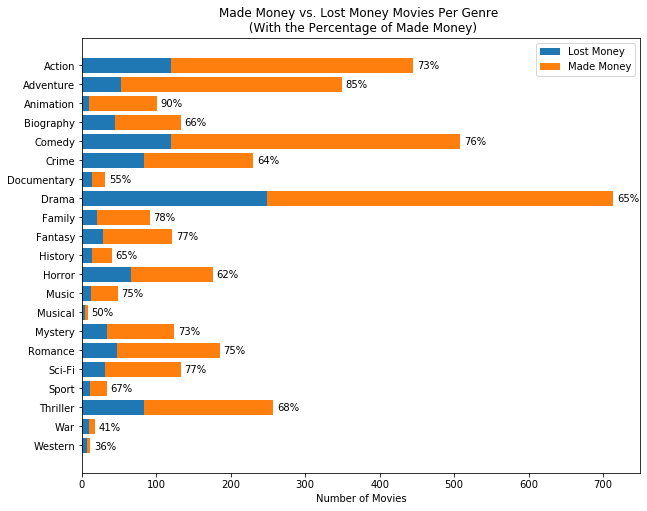

In [86]:
plt.figure(figsize=(10,8))

plt.barh(money_details.index, money_details['No_Money'], label='Lost Money')
plt.barh(money_details.index, money_details['Money'], 
         left = money_details['No_Money'], label='Made Money')


ax = plt.gca()

ax.invert_yaxis()

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

y = 0.2 
for row in money_details.index:
    x = money_details['Total'][row]
    money_perc = money_details['Money Percentage'][row]
    percentage = f'{money_perc * 100:,.0f}%' 
    ax.annotate(percentage,(x + 5, y))
    y += 1

plt.title("Made Money vs. Lost Money Movies Per Genre \n (With the Percentage of Made Money)")
plt.xlabel("Number of Movies")
plt.legend()
plt.savefig('/Users/matthewnykaza/Documents/Flatiron/Phase-1-Project/dsc-phase-1-project-online/moneymadevsmoneylost.png')
plt.show()

In [87]:
#View the overall data across all movies
overall_data = [{'index': 'Overall','Money': (money_details['Money'].sum()), 'No_Money': (money_details['No_Money'].sum()), 'Total': ((money_details['No_Money'].sum())) + money_details['Money'].sum(), 'Money Percentage': ((money_details['Money'].sum()) / (2940+812)), 'No_Money Percentage': (money_details['No_Money'].sum()) / (2940+812)}]
overall_df = pd.DataFrame(data=overall_data)
overall_df.head()


,index,Money,No_Money,Total,Money Percentage,No_Money Percentage
0,Overall,2695.0,1060.0,3755.0,0.718284,0.282516


# Some Takeaways:
- 72% of the movies in our data made money
- Animation, and Adventure movies represent the movies that most consistently make money
- Lots of data for Drama movies, but they are among the lowest in % that make money
- Do not make a War or Western movie
    - Albeit, this is a low amount of data

# Future Analysis:
- Compare this with movie budgets

# Evaluate the months and seasons in which movies premere that consistently make money

In [88]:
#Pull the month and year from release_date and create own column for them
movies_df['month'] = movies_df['release_date'].dt.strftime('%m')
movies_df['year'] = movies_df['release_date'].dt.strftime('%Y')

In [89]:
#Check for accuracy
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,Western,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,month,year
0,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,0,2010-07-16,160000000,292576195,835524642,675524642,1,0,07,2010
1,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,0,2012-07-20,275000000,448139099,1084439099,809439099,1,0,07,2012
2,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,0,2014-11-05,165000000,188017894,666379375,501379375,1,0,11,2014
3,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,1,2012-12-25,100000000,162805434,449948323,349948323,1,0,12,2012
4,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,0,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,05,2012


In [90]:
#Create code that pulls the season from the release_date, 
#stared with a letter to help with later formatting
def season_of_date(date):
    '''Takes a datetime object, and returns a season'''
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'a-Spring'
    if date in seasons['summer']:
        return 'b-Summer'
    if date in seasons['autumn']:
        return 'c-Autumn'
    else:
        return 'd-Winter'

# Assuming df has a date column of type `datetime`
movies_df['season'] = movies_df['release_date'].map(season_of_date)

In [91]:
#Check for accuracy
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,release_date,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,month,year,season
0,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,2010-07-16,160000000,292576195,835524642,675524642,1,0,07,2010,b-Summer
1,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,2012-07-20,275000000,448139099,1084439099,809439099,1,0,07,2012,b-Summer
2,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,2014-11-05,165000000,188017894,666379375,501379375,1,0,11,2014,c-Autumn
3,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,2012-12-25,100000000,162805434,449948323,349948323,1,0,12,2012,d-Winter
4,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,2012-05-04,225000000,623279547,1517935897,1292935897,1,0,05,2012,a-Spring


In [92]:
#Create a year_season column
movies_df['year_season'] = movies_df['year'].str.cat(movies_df['season'],sep=", ")

/Users/matthewnykaza/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [93]:
#Check for accuracy
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,month,year,season,year_season
0,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,160000000,292576195,835524642,675524642,1,0,07,2010,b-Summer,"2010, b-Summer"
1,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,275000000,448139099,1084439099,809439099,1,0,07,2012,b-Summer,"2012, b-Summer"
2,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,165000000,188017894,666379375,501379375,1,0,11,2014,c-Autumn,"2014, c-Autumn"
3,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,100000000,162805434,449948323,349948323,1,0,12,2012,d-Winter,"2012, d-Winter"
4,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,225000000,623279547,1517935897,1292935897,1,0,05,2012,a-Spring,"2012, a-Spring"


In [94]:
#Create data that shows Worldwide Gross and Production Budget across seasons
seasons = movies_df['year_season'].sort_values().unique()

gross_by_season = movies_df[['worldwide_gross', 'production_budget', 'year_season']].groupby('year_season').sum()

seasonal_budgets_df = pd.DataFrame(gross_by_season).rename(columns={'worldwide_gross': 'Worldwide Gross', 'production_budget': 'Production Budget'})

In [95]:
seasonal_budgets_df.head(5)


,Worldwide Gross,Production Budget
year_season,,
"2010, a-Spring",5852206559,1927100000
"2010, b-Summer",5905376774,1878400000
"2010, c-Autumn",4261319119,1746187650
"2010, d-Winter",4089796133,1549690000
"2011, a-Spring",6378344869,2128800000


In [96]:
#Cut off 2019 because data is not complete
seasonal_budgets_df.drop(labels=['2019, a-Spring', '2019, b-Summer', '2019, d-Winter'], axis=0, inplace=True)

In [97]:
#Create dateframe and reset index to help with charting
seasonal_budgets_df = seasonal_budgets_df.reset_index()
seasonal_budgets_df.head()

,year_season,Worldwide Gross,Production Budget
0,"2010, a-Spring",5852206559,1927100000
1,"2010, b-Summer",5905376774,1878400000
2,"2010, c-Autumn",4261319119,1746187650
3,"2010, d-Winter",4089796133,1549690000
4,"2011, a-Spring",6378344869,2128800000


In [98]:
seasonal_budgets_df.dtypes

year_season          object
Worldwide Gross       int64
Production Budget     int64
dtype: object

In [99]:
seasonal_budgets_df.head()

,year_season,Worldwide Gross,Production Budget
0,"2010, a-Spring",5852206559,1927100000
1,"2010, b-Summer",5905376774,1878400000
2,"2010, c-Autumn",4261319119,1746187650
3,"2010, d-Winter",4089796133,1549690000
4,"2011, a-Spring",6378344869,2128800000


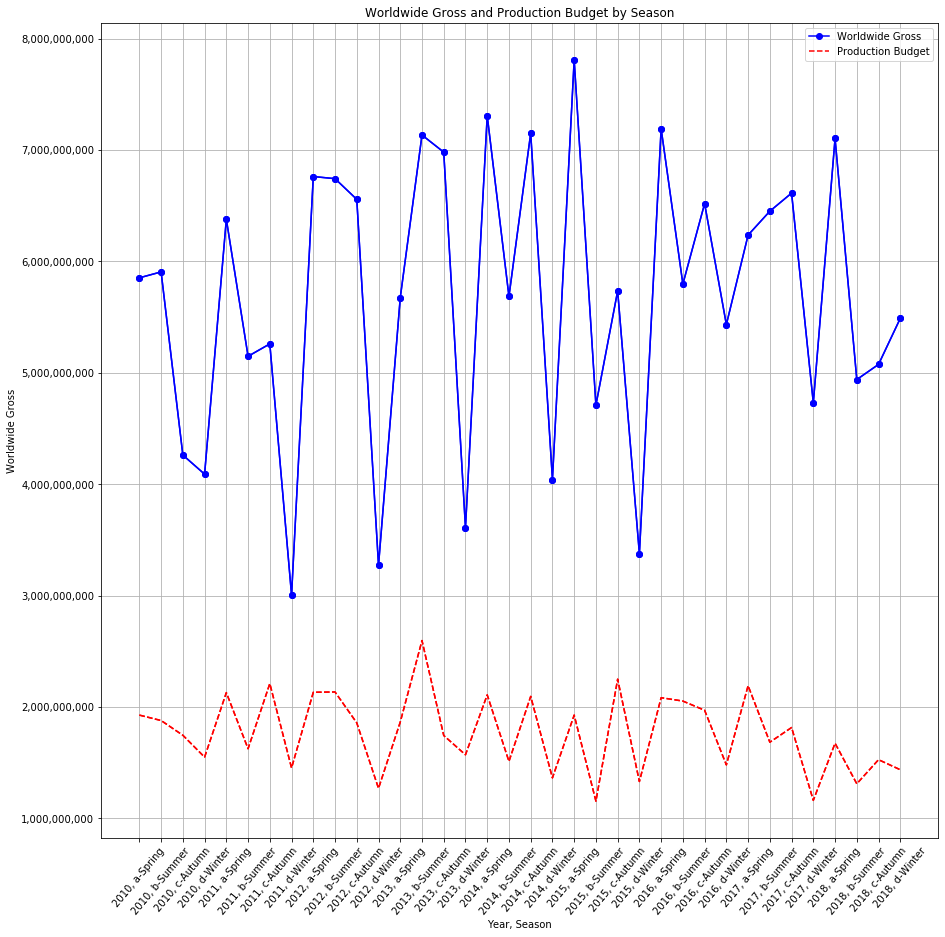

In [100]:
#Plot line charts of each
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(seasonal_budgets_df['year_season'], seasonal_budgets_df['Worldwide Gross'], 'bo-')
plt.plot(seasonal_budgets_df['year_season'], seasonal_budgets_df['Production Budget'], 'r--' )
legend_1 = plt.plot(seasonal_budgets_df['year_season'], seasonal_budgets_df['Worldwide Gross'], 'bo-', label='Worldwide Gross')
legend_2 = plt.plot(seasonal_budgets_df['year_season'], seasonal_budgets_df['Production Budget'], 'r--', label = 'Production Budget')
degrees = 50
plt.title('Worldwide Gross and Production Budget by Season')
plt.xlabel('Year, Season')
plt.xticks(rotation=degrees)
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('/Users/matthewnykaza/Documents/Flatiron/Phase-1-Project/dsc-phase-1-project-online/worldwidegrossbyseason.png')
plt.show()

In [101]:
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,production_budget,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,month,year,season,year_season
0,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,160000000,292576195,835524642,675524642,1,0,07,2010,b-Summer,"2010, b-Summer"
1,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,275000000,448139099,1084439099,809439099,1,0,07,2012,b-Summer,"2012, b-Summer"
2,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,165000000,188017894,666379375,501379375,1,0,11,2014,c-Autumn,"2014, c-Autumn"
3,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,100000000,162805434,449948323,349948323,1,0,12,2012,d-Winter,"2012, d-Winter"
4,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,225000000,623279547,1517935897,1292935897,1,0,05,2012,a-Spring,"2012, a-Spring"


In [102]:
#Create data that shows Worldwide Gross and Production Budget across months
seasons = movies_df['month'].sort_values().unique()

gross_by_season = movies_df[['worldwide_gross', 'production_budget', 'month']].groupby('month').sum()

month_budgets_df = pd.DataFrame(gross_by_season).rename(columns={'worldwide_gross': 'Worldwide Gross', 'production_budget': 'Production Budget'})
month_budgets_df.reset_index(inplace=True)

In [103]:
month_budgets_df.head(12)

,month,Worldwide Gross,Production Budget
0,01,5580739964,2258427000
1,02,12884396341,4030440000
2,03,19688010273,6834240000
3,04,14727316008,3899300000
4,05,24463124489,7794950000
5,06,27427188490,7669142000
6,07,23649697207,6778555000
7,08,11341477587,4247470000
8,09,9585598270,3642552650
9,10,12153276970,4121785000


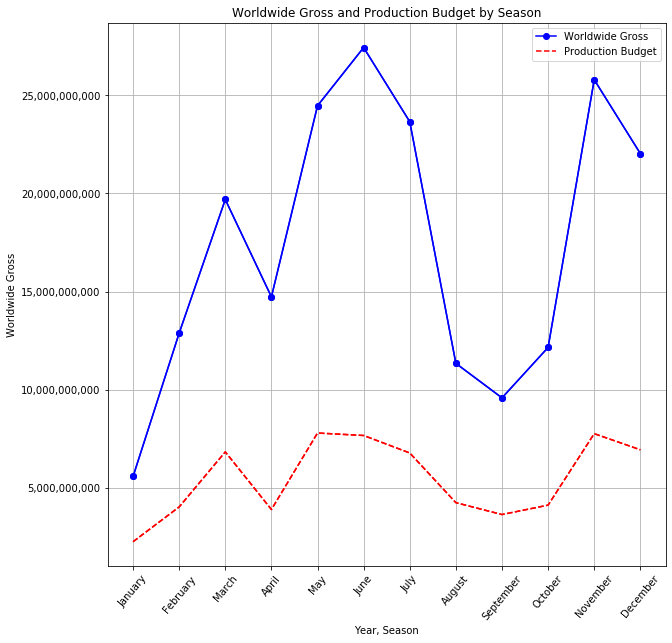

In [104]:
#Plot same chart, but this time for month
#Plot line charts of each
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(month_budgets_df['month'], month_budgets_df['Worldwide Gross'], 'bo-')
plt.plot(month_budgets_df['month'], month_budgets_df['Production Budget'], 'r--' )
legend_1 = plt.plot(month_budgets_df['month'], month_budgets_df['Worldwide Gross'], 'bo-', label='Worldwide Gross')
legend_2 = plt.plot(month_budgets_df['month'], month_budgets_df['Production Budget'], 'r--', label = 'Production Budget')

plt.title('Worldwide Gross and Production Budget by Season')
plt.xlabel('Year, Season')
degrees = 50
plt.xticks(rotation=degrees)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'January'
labels[1] = 'February'
labels[2] = 'March'
labels[3] = 'April'
labels[4] = 'May'
labels[5] = 'June'
labels[6] = 'July'
labels[7] = 'August'
labels[8] = 'September'
labels[9] = 'October'
labels[10] = 'November'
labels[11] = 'December'
ax.set_xticklabels(labels)
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('/Users/matthewnykaza/Documents/Flatiron/Phase-1-Project/dsc-phase-1-project-online/worldwidegrossandbudgetbyseason.png')
plt.show()

# Some Takeaways:
- Movies in May, June, July and November make the most money
- They also have higher production budgets, but not so much higher to make that the clearest indicator
- Even if other studios have decided that these are the months that they want people to see movies, it still shows when people are used to seeing blockbusters, and are most likely to watch them
- Overall avoid Winter as a month to come out with a movie, and if it's Autumn, make sure that its in November
- Late Spring through early-middleSummer looks to be the best time 
    - Despite the higher production costs in general, those months are the highest grossing

# Analysis on movies that are a commercial success (rating > 7, gross > $110,000,000)

In [105]:
#Create the conditionals that indicate commercial success
condition_1 = (movies_df['gross_less_budget'] >= 108514727) & (movies_df['averagerating'] >= 7)
condition_2 = (movies_df['gross_less_budget'] < 108514727) | (movies_df['averagerating'] < 7)
conditions= [condition_1, condition_2]
choices = [1,0]
movies_df['commercial_success'] = np.select(conditions, choices, default="")
movies_df.head()


,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,domestic_gross,worldwide_gross,gross_less_budget,made_money,lost_money,month,year,season,year_season,commercial_success
0,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,292576195,835524642,675524642,1,0,07,2010,b-Summer,"2010, b-Summer",1
1,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,448139099,1084439099,809439099,1,0,07,2012,b-Summer,"2012, b-Summer",1
2,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,188017894,666379375,501379375,1,0,11,2014,c-Autumn,"2014, c-Autumn",1
3,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,162805434,449948323,349948323,1,0,12,2012,d-Winter,"2012, d-Winter",1
4,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,623279547,1517935897,1292935897,1,0,05,2012,a-Spring,"2012, a-Spring",1


In [106]:
#check for NaNs
movies_df.isna().sum()

title_year            0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
Action                0
Adult                 0
Adventure             0
Animation             0
Biography             0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Family                0
Fantasy               0
Game-Show             0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
News                  0
Reality-TV            0
Romance               0
Sci-Fi                0
Short                 0
Sport                 0
Thriller              0
Unknown               0
War                   0
Western               0
release_date          0
production_budget     0
domestic_gross        0
worldwide_gross       0
gross_less_budget     0
made_money            0
lost_money            0
month                 0
year            

In [107]:
#Change commercial success into an integer
movies_df['commercial_success'] = movies_df['commercial_success'].astype('int64')
movies_df.dtypes
movies_df.dtypes

title_year                    object
start_year                     int64
runtime_minutes              float64
genres                        object
averagerating                float64
numvotes                       int64
Action                         int64
Adult                          int64
Adventure                      int64
Animation                      int64
Biography                      int64
Comedy                         int64
Crime                          int64
Documentary                    int64
Drama                          int64
Family                         int64
Fantasy                        int64
Game-Show                      int64
History                        int64
Horror                         int64
Music                          int64
Musical                        int64
Mystery                        int64
News                           int64
Reality-TV                     int64
Romance                        int64
Sci-Fi                         int64
S

In [108]:
movies_df['name_month'] = movies_df['release_date'].dt.month_name()

In [109]:
movies_df.head()

,title_year,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,Adventure,Animation,...,worldwide_gross,gross_less_budget,made_money,lost_money,month,year,season,year_season,commercial_success,name_month
0,Inception (2010),2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,1,0,...,835524642,675524642,1,0,07,2010,b-Summer,"2010, b-Summer",1,July
1,The Dark Knight Rises (2012),2012,164.0,"Action,Thriller",8.4,1387769,1,0,0,0,...,1084439099,809439099,1,0,07,2012,b-Summer,"2012, b-Summer",1,July
2,Interstellar (2014),2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,0,0,1,0,...,666379375,501379375,1,0,11,2014,c-Autumn,"2014, c-Autumn",1,November
3,Django Unchained (2012),2012,165.0,"Drama,Western",8.4,1211405,0,0,0,0,...,449948323,349948323,1,0,12,2012,d-Winter,"2012, d-Winter",1,December
4,The Avengers (2012),2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,1,0,1,0,...,1517935897,1292935897,1,0,05,2012,a-Spring,"2012, a-Spring",1,May


In [110]:
months_col = movies_df['name_month'].str.split()

In [111]:
months_col

0           [July]
1           [July]
2       [November]
3       [December]
4            [May]
           ...    
1458    [December]
1459    [December]
1460     [October]
1461        [June]
1462    [December]
Name: name_month, Length: 1463, dtype: object

In [112]:
months_list = []
for row in months_col:
    for item in row:
        months_list.append(item)
        
months_list = list(set(months_list))
    

In [113]:
months_list

['August',
 'October',
 'July',
 'March',
 'May',
 'April',
 'September',
 'November',
 'February',
 'December',
 'January',
 'June']

In [114]:
months_df = pd.DataFrame(months_col)

In [115]:
for col in months_list:
    months_df[col] = 0

In [116]:

for row in months_df.index:
    for month in months_list:
        if month in months_df['name_month'][row]:
            months_df[month][row] = 1

/Users/matthewnykaza/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [117]:
months_df.head()

,name_month,August,October,July,March,May,April,September,November,February,December,January,June
0,[July],0,0,1,0,0,0,0,0,0,0,0,0
1,[July],0,0,1,0,0,0,0,0,0,0,0,0
2,[November],0,0,0,0,0,0,0,1,0,0,0,0
3,[December],0,0,0,0,0,0,0,0,0,1,0,0
4,[May],0,0,0,0,1,0,0,0,0,0,0,0


In [118]:
movies_df = pd.concat([movies_df, months_df[months_list]], axis=1)

In [119]:
movies_df.columns

Index(['title_year', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Thriller', 'Unknown', 'War', 'Western',
       'release_date', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'gross_less_budget', 'made_money', 'lost_money',
       'month', 'year', 'season', 'year_season', 'commercial_success',
       'name_month', 'August', 'October', 'July', 'March', 'May', 'April',
       'September', 'November', 'February', 'December', 'January', 'June'],
      dtype='object')

In [120]:
commercial_month_details = {}

for month in months_list:
    month_df = movies_df.loc[movies_df[month] == 1]
    month_pop = month_df['commercial_success'].sum()
    month_unpop = len(month_df) - month_pop
    month_pop_perc = month_df['commercial_success'].mean()
    month_unpop_perc = 1 - month_pop_perc
    commercial_month_details[month] = {'Commercial Success': month_pop,
                                         'Commercial Failure': month_unpop,
                                         'Total': month_pop + month_unpop,
                                         }

In [121]:
month_details_df = pd.DataFrame(commercial_month_details).T

In [122]:
month_details_df

,Commercial Success,Commercial Failure,Total
August,8,113,121
October,12,151,163
July,14,111,125
March,13,109,122
May,18,82,100
April,9,83,92
September,8,133,141
November,33,111,144
February,10,80,90
December,29,155,184


In [123]:
month_details_df['Success Percentage'] = month_details_df['Commercial Success'] / month_details_df['Total']
month_details_df['Failure Percentage'] = month_details_df['Commercial Failure'] / month_details_df['Total']


In [124]:
month_details_df.sort_values('Success Percentage', ascending=False).head(12)

,Commercial Success,Commercial Failure,Total,Success Percentage,Failure Percentage
November,33,111,144,0.229167,0.770833
May,18,82,100,0.180000,0.820000
June,19,96,115,0.165217,0.834783
December,29,155,184,0.157609,0.842391
July,14,111,125,0.112000,0.888000
February,10,80,90,0.111111,0.888889
March,13,109,122,0.106557,0.893443
April,9,83,92,0.097826,0.902174
October,12,151,163,0.073620,0.926380
August,8,113,121,0.066116,0.933884


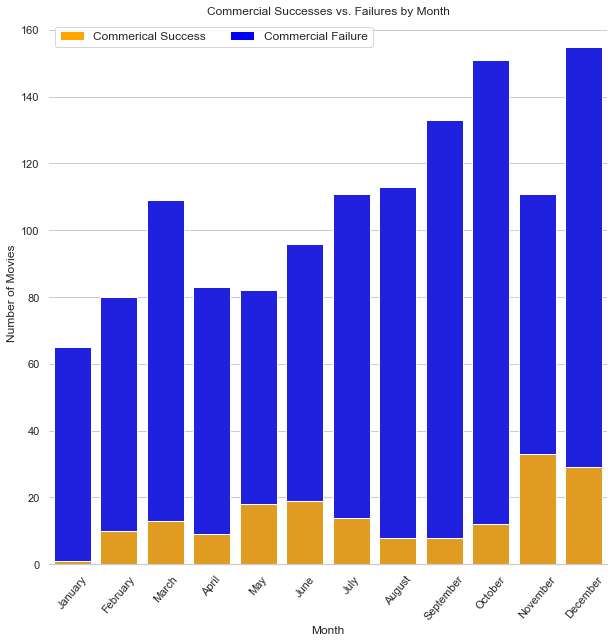

In [125]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10,10))
sns.barplot(x=month_details_df.index, y= 'Commercial Failure', 
            order=month_order, data=month_details_df, color='blue')
bottom_plot = sns.barplot(x=month_details_df.index, y='Commercial Success', 
            order=month_order, data=month_details_df, color='orange')
total=float(len(month_details_df))
sns.despine(left=True)
topbar = plt.Rectangle((0,0),1,1, fc='blue')
bottombar = plt.Rectangle((0,0),1,1, fc='orange' )
bottom_plot.set_ylabel("Number of Movies")
bottom_plot.set_xlabel("Month")
plt.legend([bottombar, topbar], ['Commerical Success', 'Commercial Failure'], loc=0, ncol = 2, prop={'size':12})
plt.title('Commercial Successes vs. Failures by Month')
plt.xticks(rotation=50)
plt.savefig('/Users/matthewnykaza/Documents/Flatiron/Phase-1-Project/dsc-phase-1-project-online/commercialsuccessesvsfailuresbymonth.png')
plt.show()


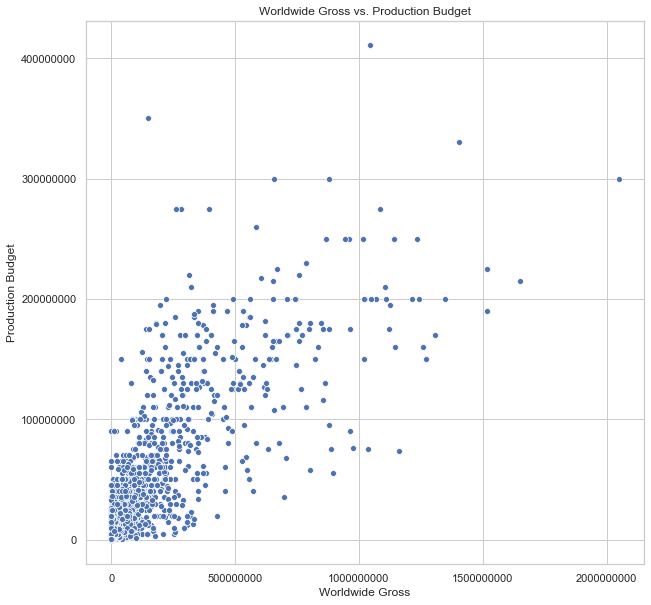

In [143]:
plt.figure(figsize=(10,10))
ax = plt.gca()

sns.scatterplot(data=movies_df, x='worldwide_gross', y='production_budget')
plt.title('Worldwide Gross vs. Production Budget')
plt.ylabel("Production Budget")
plt.xlabel("Worldwide Gross")
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)

plt.show()


# Some Takeaways:
- November statistically has the most successes
- Do not release a movie in January
- Similar to the seasonal data, it shows that the late-spring early-summer and early winter months are the ideal time to release a movie

# Conclusions:
This analysis has lead to three recommendations for Microsoft's budding movie empire.

- Focus on genres that consistently make money such as Animation and Adventure movies. 
    - Given that Microsoft is already a major software company I think leveraging that business into the animation genre can relly pay dividends and nearly guarntee money made.
- Avoid releasing movies in the Autumn season. 
    - All of the five lowest grossing seasons over the past 10 years are in autumn, best to make sure to avoid any releases during this time.
- Release movies in November and December
    - Over the past ten years November and December have the most commercial successes (over a 7 average rating and greater than $110,000,000 made. By percentages Novemeber has 23% success on that metric with the next closest being June at 17% success (only a 29 movie difference in between November (144) and June (115).


- Historically, movies in May, June and November have the highest production budgets.
    

# Further Analysis:
Completing these following steps can help with ensuring Microsoft's success. 
- Comparison of genre and movie budgets to assist with seeing which movies will cost the most to produce.
- Get data on actors/actresses to see which stars are best able to move the needle for successful movies.
- Get more data for the reviews and see which movies are most likely to achieve higher ratings, and which are more likely to have poor reviews.